# Project: Investigate a Dataset (TMDb Movie Data)
The content of this notebook is the original work of Xavier López done as a project from the *Data Analysis* Udacity's.nanodegree.

The goal of the notebook is to do data analysis on a given dataset and answer data-related questions using python data manipulation and visualization.

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
    
<li><a href="#wrangling">2. Data Cleaning</a></li>
    <ul>
    <li><a href="#gp">2.1 General Properties</a></li>
    <li><a href="#iuc">2.2 Index Uniqueness Check</a></li>
    <li><a href="#dmv">2.3 Dealing with Missing Values</a></li>
    <li><a href="#miv">2.4 Missinformative Values</a></li>
    </ul>
    
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#rq1">3.1 RQ1</a></li>
    <li><a href="#rq2">3.2 RQ2</a></li>
    <li><a href="#rq3">3.3 RQ3</a></li>
    <li><a href="#rq4">3.4 RQ4</a></li>
    <li><a href="#rq5">3.5 RQ5</a></li>
    <li><a href="#rq6">3.6 RQ6</a></li>
    <li><a href="#rq7">3.7 RQ7</a></li>
    </ul>
    
<li><a href="#conc">4. Conclusions</a></li>
</ul>



<a id='intro'></a>
## 1. Introduction


>The aim of this notebook is to investigate a given data set, play with the data and answer research questions on the way. 
>The data set choice has been 
<a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000">The Movie Database (TMDb)</a>. This dataset contains data cleaned from an orignal <a href = "https://www.kaggle.com/tmdb/tmdb-movie-metadata"> "Kaggle dataset" </a>.
>
>The sutdied dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including genre, cast, release_year, user ratings and revenue.

>The research questions I have been interested on answering can be classified in two categories:
- **Genre/Cast based**:
>>**RQ1:** Which genres appear more times in the dataset form year to year?
>>
>>**RQ2:** What are the total top 5 more frequent genres on the dataset?
>>
>>**RQ3:** How was the distribution of genres in the most recent year? How was in the latest year?
>>
>>**RQ4**: How has the distribution evolved during the years? did all genres grow in the same rate? 
>>
>>**RQ5:** For the most popular genre, report the name of the 20 cast members that appear in more movies of the given genre, and the number of movies in which they appear.
>
>- **Revenue based**:
>>**RQ6:** Considering *profit = revenue - budget*, which genre has the greatest average profit?
>>
>>**RQ7:** From the most profitable genre, which *producer* has the most profitable average film production?

In [1]:
import pandas as pd

#data viz:
import matplotlib.pyplot as plt #basic
import altair as alt #interactive
import pylab as pl #useful to include titles 

%matplotlib inline

<a id='wrangling'></a>
## 2. Data Cleaning

> In this section of the report, data is loaded, checked for cleanliness and then we proceede to trim and clean the dataset for analysis.
>
> The tasks that will be done are:
> - Drop unnecessary features
> - Drop duplicates and NaNs for the "imdb_id" 

<a id='gp'></a>
### 2.1 General Properties

> Before proceeding, we list the fields that we will need to answer the research questions:
> - movie name
> - genre
> - year of release
> - average vote
> - cast members
> - revenue
> - budget
> - producer
>
>Lets get started reading the data:





In [2]:
df = pd.read_csv("data/tmdb-movies.csv")
df.set_index("id", inplace = True)
df.head(10).T

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673
popularity,32.9858,28.4199,13.1125,11.1731,9.33501,9.1107,8.65436,7.6674,7.40416,6.3268
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/,http://www.foxmovies.com/movies/the-revenant,http://www.terminatormovie.com/,http://www.foxmovies.com/movies/the-martian,http://www.minionsmovie.com/,http://movies.disney.com/inside-out
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home,"(n. One who has returned, as if from the dead.)",Reset the future,Bring Him Home,"Before Gru, they had a history of bad bosses",Meet the little voices inside your head.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...,android|spaceship|jedi|space opera|3d,car race|speed|revenge|suspense|car,father-son relationship|rape|based on novel|mo...,saving the world|artificial intelligence|cybor...,based on novel|mars|nasa|isolation|botanist,assistant|aftercreditsstinger|duringcreditssti...,dream|cartoon|imaginary friend|animation|kid


>Drop the columns that are not relevant to answer the research questions:

In [3]:
df.drop(['popularity','homepage','tagline','keywords','overview','runtime','vote_count','release_date','revenue_adj','budget_adj'], axis = 1, inplace = True)
df.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'genres', 'production_companies', 'vote_average', 'release_year'],
      dtype='object')

>Note that the dataset has two columns "id" and "imdb_id". Since the source of "id" is unclear but the source of "imdb_id" is not (it corresponts to the www.imdb.com database id) we will use "imdb_id".

<a id='iuc'></a>
### 2.2 Index uniqueness check
>Cheacking for cleanliness we must make sure this "imdb_id" is not repeated or null in our studied dataset:

In [4]:
df['imdb_id'].duplicated().any()

True

In [5]:
df[df['imdb_id'].duplicated()]['imdb_id']

id
287663          NaN
15257           NaN
101907          NaN
42194     tt0411951
45644           NaN
369145          NaN
269177          NaN
279954          NaN
50127           NaN
50128           NaN
Name: imdb_id, dtype: object

In [6]:
len(df[df['imdb_id'].duplicated()]['imdb_id'])

10

In [7]:
df[df['imdb_id'].duplicated()].T.head(5)

id,287663,15257,101907,42194,45644,369145,269177,279954,50127,50128
imdb_id,NaN,NaN,NaN,tt0411951,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,30000000,0,0,0,500,0,0
revenue,0,0,0,967000,0,0,0,0,0,0
original_title,Star Wars Rebels: Spark of Rebellion,Hulk vs. Wolverine,Hulk vs. Thor,TEKKEN,Opeth: In Live Concert At The Royal Albert Hall,Doctor Who: The Snowmen,Party Bercy,Portal: Survive!,Fallen: The Journey,Fallen: The Destiny
cast,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,Florence Foresti,Monique Blanchard|Bradley Mixon,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...


In [8]:
print("Number of NaN at imdb_id colunn:")
nans_imdbid = len(df[df['imdb_id'].isna()]['imdb_id'])
nans_imdbid

Number of NaN at imdb_id colunn:


10

In [9]:
print("Total number of film entries:")
df.shape[0]

Total number of film entries:


10866

In [10]:
print("% of NaN's at imdb_id compared to the total number of entries of the dataset")
(nans_imdbid/df.shape[0])*100

% of NaN's at imdb_id compared to the total number of entries of the dataset


0.09203018590097553

> Since the number of duplicates in the imdb_id column represent less than 0.1% of the total of entries of the dataset, and they do not seem to have any meaningful reason to exist, those rows will be dropped:

In [11]:
df.dropna(subset=['imdb_id'], inplace=True)

> We have droped NaN's, we should also drop duplicates

In [12]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,
42194,tt0411951,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010


In [13]:
df.drop_duplicates(subset = "imdb_id", keep = "first", inplace = True)

> Now the dataset contains only unique id's on the "imdb_id" column and no NANs on that column.
>
> Lets doublecheck that this statement is correct:

In [14]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,


In [15]:
df[df['imdb_id'].isna()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,


In [16]:
df.set_index("imdb_id", inplace = True)

<a id='dmv'></a>
### 2.3 Dealing with Missing Values

>Lets explore the size of the dataset

In [17]:
df.shape

(10855, 9)

>Our dataset contains 10855 different movies.
>
>Check the missing values:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, tt0369610 to tt0060666
Data columns (total 9 columns):
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
director                10815 non-null object
genres                  10834 non-null object
production_companies    9830 non-null object
vote_average            10855 non-null float64
release_year            10855 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 848.0+ KB


> Note that we only have problems of missing values on the features *cast*,director,genres* and *production_companies*. 
>
>Before dropping, lets check if there is overlap of missing values and what is the number of total rows that contain some missing value:

In [19]:
def nans(df): return df[df.isnull().any(axis=1)]

In [20]:
df_nans = nans(df)
df_nans.shape

(1085, 9)

In [21]:
df_nans.shape[0]/df.shape[0]

0.09995393827729157

>Note that almost 10% of our dataset contains some missing data, this is too great to discard it without any analysis, lets explore a bit the data distribution:

Text(0.5,0.98,'Data distribution of entries containing some NaN')

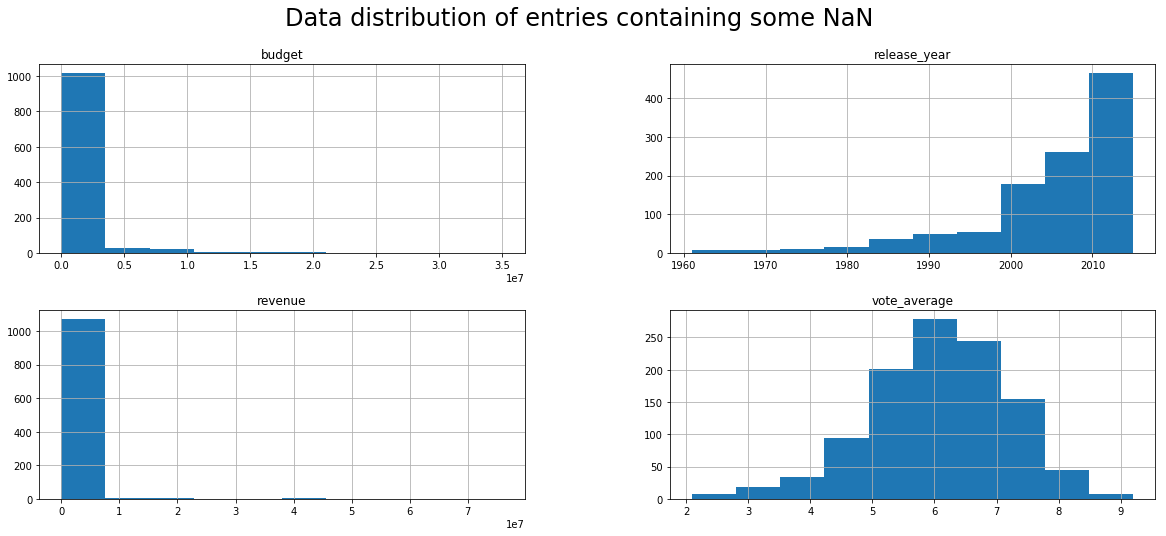

In [22]:
df_nans.hist(figsize = (20,8))
pl.suptitle('Data distribution of entries containing some NaN', fontsize=24)

>Note that the revenue and budget for those films are very concentrated to zero, which would be equivalent of not being informed.
>
>asdf

In [23]:
df_ff =  df.dropna(how='any') #ff = fully filled
df_ff.describe()

,budget,revenue,vote_average,release_year
count,9.770000e+03,9.770000e+03,9770.000000,9770.000000
mean,1.618298e+07,4.424026e+07,5.963388,2000.876766
std,3.221320e+07,1.225998e+08,0.913207,13.037610
min,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,5.400000,1994.000000
50%,2.000000e+05,0.000000e+00,6.000000,2005.000000
75%,1.936250e+07,3.105779e+07,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,8.700000,2015.000000


Text(0.5,0.98,'Data distribution of entries that do NOT contain any NaN')

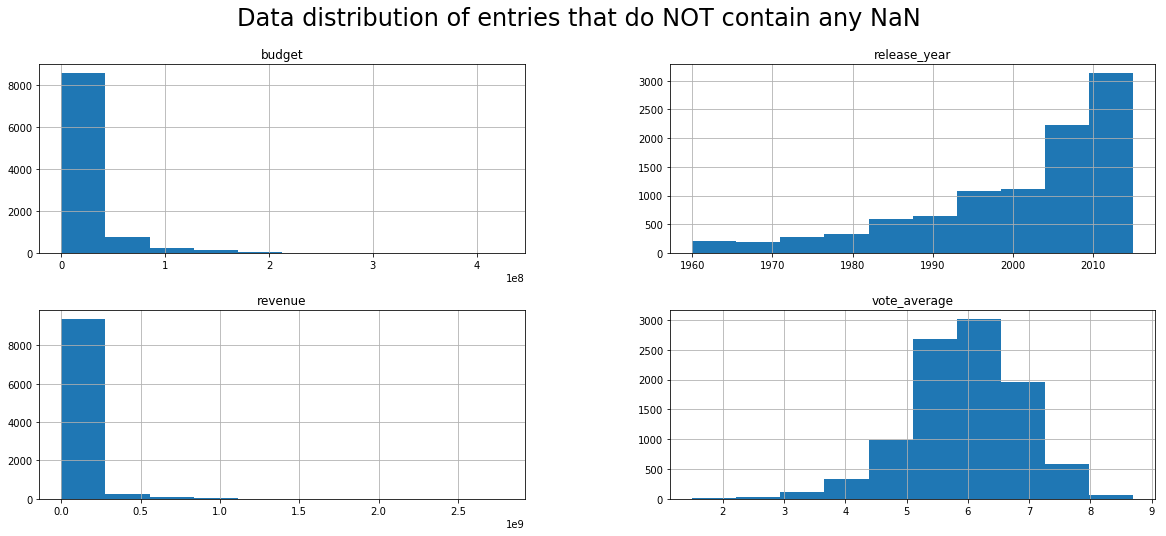

In [24]:
df_ff.hist(figsize = (20,8))
pl.suptitle('Data distribution of entries that do NOT contain any NaN', fontsize=24)

> Note that de data distribution of the data that contain missing values vs the rest of it is not very different therefore for simplicit we willd rop the entries that contain some missing values:



In [25]:
df = df_ff

<a id='miv'></a>
### 2.4 Missinformative Values

>From the previoius ditribution charts one can note that there are a lot of movies with a budget and/or revenue equal to zero.
>
>Lets count them:

In [26]:
df_z = df[(df.budget==0) | (df.revenue == 0)]
df_z.shape

(5965, 9)

In [27]:
df_z.shape[0]/df.shape[0]

0.6105424769703173

>Note that now the entries that contain budget or revenue equal to zero represent 60% of the dataset.
>
>Lets check their distribution and compare it to the entries with a budget and revenue greater than zero

In [28]:
df_ff.describe()

,budget,revenue,vote_average,release_year
count,9.770000e+03,9.770000e+03,9770.000000,9770.000000
mean,1.618298e+07,4.424026e+07,5.963388,2000.876766
std,3.221320e+07,1.225998e+08,0.913207,13.037610
min,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,5.400000,1994.000000
50%,2.000000e+05,0.000000e+00,6.000000,2005.000000
75%,1.936250e+07,3.105779e+07,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,8.700000,2015.000000


Text(0.5,0.98,'Data distribution of films with revenue or budget equal to zero')

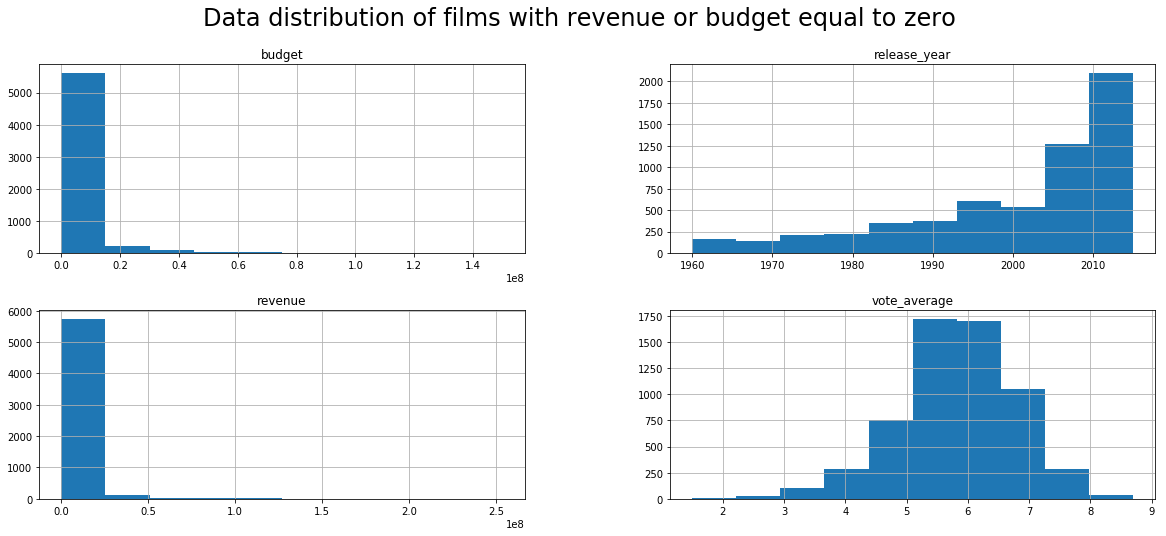

In [29]:
df_z.hist(figsize = (20,8))
pl.suptitle('Data distribution of films with revenue or budget equal to zero', fontsize=24)

Text(0.5,0.98,'Data distribution of films with revenue and budget greater than zero')

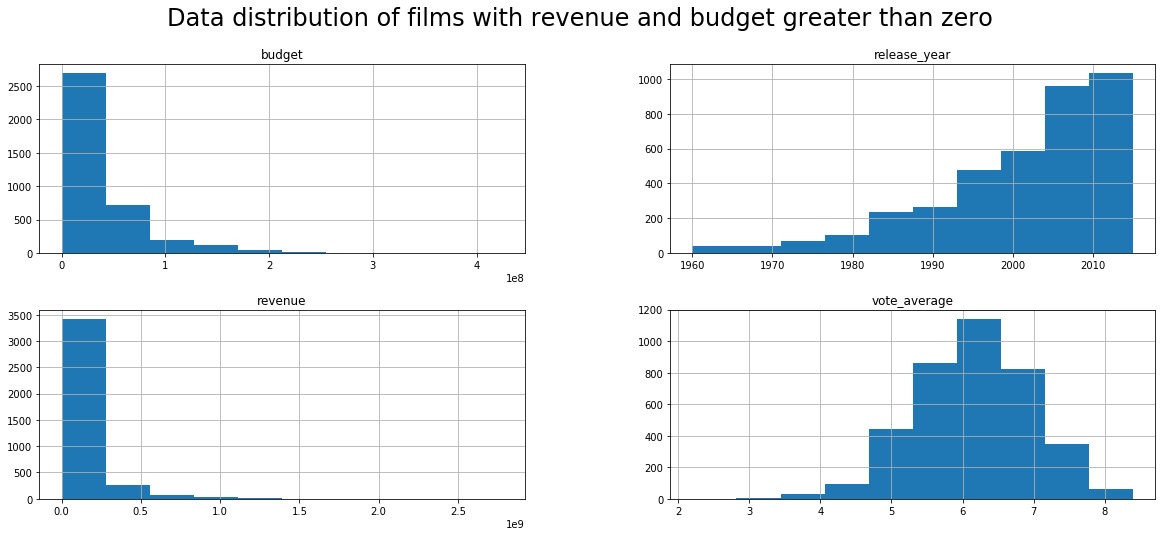

In [30]:
df_nz = df[(df.budget>0) & (df.revenue > 0)]
df_nz.hist(figsize = (20,8))
pl.suptitle('Data distribution of films with revenue and budget greater than zero', fontsize=24)

>Since we do not see a big change in the distribution we remove those movies, yet its important to recall that we have dropped more than 60% of our original dataset to remove entris containing miss informative values (zeros in revenu and budget) and missing values.

In [31]:
df = df_nz

In [32]:
df.describe()

,budget,revenue,vote_average,release_year
count,3.805000e+03,3.805000e+03,3805.000000,3805.000000
mean,3.760800e+07,1.089734e+08,6.170565,2001.229172
std,4.232179e+07,1.772976e+08,0.792437,11.329616
min,1.000000e+00,2.000000e+00,2.200000,1960.000000
25%,1.000000e+07,1.433379e+07,5.700000,1995.000000
50%,2.500000e+07,4.621664e+07,6.200000,2004.000000
75%,5.000000e+07,1.260695e+08,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,8.400000,2015.000000


In [33]:
df.shape

(3805, 9)

Finally we have a dataset of 3800 movies fully informed and ready to answer the research questions

In [34]:
df.T

imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673,...,tt0077369,tt0077745,tt0078504,tt0077394,tt0078480,tt0061184,tt0061107,tt0061619,tt0060934,tt0060397
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000,...,12000000,3500000,24000000,6800000,1000000,7500000,3000000,4653000,12000000,5115000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609,...,22765081,24046533,21049053,26518355,3713768,33736689,13000000,6000000,20000000,12000000
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out,...,Convoy,Invasion of the Body Snatchers,The Wiz,Damien: Omen II,Watership Down,Who's Afraid of Virginia Woolf?,Torn Curtain,El Dorado,The Sand Pebbles,Fantastic Voyage
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,...,Kris Kristofferson|Ali MacGraw|Ernest Borgnine...,Donald Sutherland|Brooke Adams|Leonard Nimoy|V...,Diana Ross|Michael Jackson|Nipsey Russell|Ted ...,William Holden|Lee Grant|Jonathan Scott-Taylor...,John Hurt|Richard Briers|Michael Graham Cox|Jo...,Elizabeth Taylor|Richard Burton|George Segal|S...,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,John Wayne|Robert Mitchum|James Caan|Charlene ...,Steve McQueen|Richard Attenborough|Richard Cre...,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter,...,Sam Peckinpah,Philip Kaufman,Sidney Lumet,Don Taylor|Mike Hodges,Martin Rosen,Mike Nichols,Alfred Hitchcock,Howard Hawks,Robert Wise,Richard Fleischer
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Fantasy,Action|Crime|Thriller,Western|Drama|Adventure|Thriller,Science Fiction|Action|Thriller|Adventure,Drama|Adventure|Science Fiction,Family|Animation|Adventure|Comedy,Comedy|Animation|Family,...,Action|Comedy|Drama,Horror|Thriller|Science Fiction|Mystery,Adventure|Family|Fantasy|Music|Science Fiction,Action|Drama|Horror|Thriller,Adventure|Animation|Drama,Drama,Mystery|Thriller,Action|Western,Action|Adventure|Drama|War|Romance,Adventure|Science Fiction
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Village Roadshow Pictures|Kennedy Miller Produ...,Summit Entertainment|Mandeville Films|Red Wago...,Lucasfilm|Truenorth Productions|Bad Robot,Universal Pictures|Original Film|Media Rights ...,Regency Enterprises|Appian Way|CatchPlay|Anony...,Paramount Pictures|Skydance Productions,Twentieth Century Fox Film Corporation|Scott F...,Universal Pictures|Illumination Entertainment,Walt Disney Pictures|Pixar Animation Studios|W...,...,EMI Films Ltd.,United Artists|Solofilm,Universal Pictures|Motown Productions,Twentieth Century Fox Film Corporation|Mace Ne...,Nepenthe Productions|Watership Productions,Chenault Productions,Universal Pictures,Paramount Pictures|Laurel Productions,Twentieth Century Fox Film Corporation|Solar P...,Twentieth Century Fox Film Corporation
vote_average,6.5,7.1,6.3,7.5,7.3,7.2,5.8,7.6,6.5,8,...,6.2,6.5,6.1,6.1,6.8,7.5,6.3,6.9,7,6.7
release_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,1978,1978,1978,1978,1978,1966,1966,1966,1966,1966


<a id='eda'></a>
## 3. Exploratory Data Analysis

After some general data cleaning we are able to face the research questions, in this part the code is provided and the results are quite clear in visualizations/tables, some coments are also made.

To see short text form conclusions of each research question look at the <a href="#conclusions">Conclusions</a> section below.

<a id='rq1'></a>
### 3.1 Research Question 1:
#### Which genres appear more times in the dataset form year to year?

In [35]:
df.head(5)

,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
imdb_id,,,,,,,,,
tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [36]:
df_genres = df.genres.str.get_dummies("|")
df_genres.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdb_id,,,,,,,,,,,,,,,,,,,,
tt0369610,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
tt1392190,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
tt2908446,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
tt2488496,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
tt2820852,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
df_gy = df[["genres","release_year"]].merge(df_genres, left_index=True, right_index=True, how = "left")
df_gy.head(5)

,genres,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0369610,Action|Adventure|Science Fiction|Thriller,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
tt1392190,Action|Adventure|Science Fiction|Thriller,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
tt2908446,Adventure|Science Fiction|Thriller,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
tt2488496,Action|Adventure|Science Fiction|Fantasy,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
tt2820852,Action|Crime|Thriller,2015,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df_gy.drop(["genres"],axis = 1, inplace = True) #drop the column of concatenation of genres
df_yh = df_gy.groupby("release_year").sum() # year genre
df_yh.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


In [39]:
df_yh.T.idxmax(axis = 0)

release_year
1960        Drama
1961        Drama
1962        Drama
1963        Drama
1964        Drama
1965        Drama
1966       Action
1967        Drama
1968        Drama
1969    Adventure
1970        Drama
1971     Thriller
1972       Action
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977        Drama
1978        Drama
1979        Drama
1980        Drama
1981       Comedy
1982        Drama
1983     Thriller
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992        Drama
1993        Drama
1994       Comedy
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999       Comedy
2000        Drama
2001       Comedy
2002        Drama
2003       Comedy
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Dra

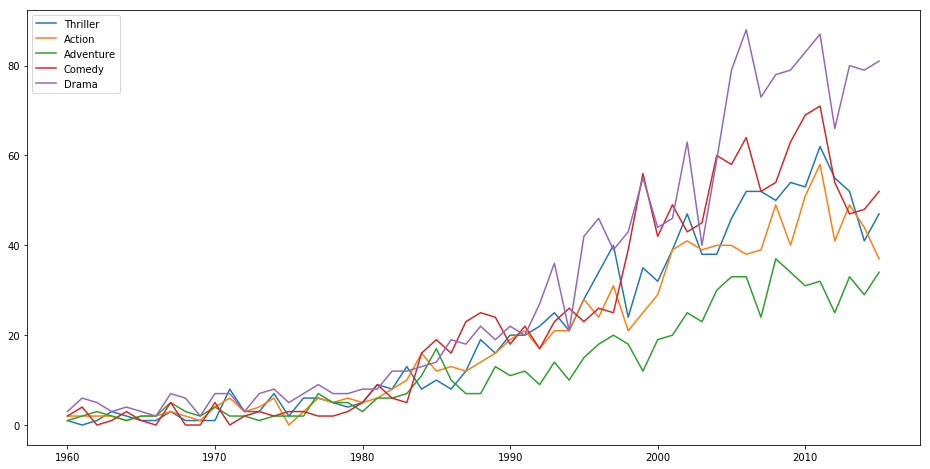

In [40]:
top_anual_genres = set(df_yh.T.idxmax(axis = 0)); top_anual_genres

plt.figure(figsize=(16,8))
for genre in top_anual_genres:
    x = df_yh[genre].index.astype(int)
    y = df_yh[genre].values
    plt.plot(x,y)
    
plt.legend(list(top_anual_genres), loc='upper left')

Top winners genres are Adenture, Comedy, Drama, Action and Thriller, those are the genres that have been leads on number of movies in our database in at least one year of release date.

<a id='rq2'></a>
### 3.2 Research Question 2 
#### What are the total top 5 more frequent genres on the dataset?

In [41]:
def count_genres(df_yh):
    df_totalgenre = pd.DataFrame(df_yh.sum(axis = 0))
    df_totalgenre.rename(columns={ df_totalgenre.columns[0]: "count" }, inplace = True)
    df_totalgenre.sort_values(by=['count'], ascending = False, inplace = True)
    return(df_totalgenre)

In [42]:
count_genres(df_yh).T

,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,Music,History,War,Western,Documentary,Foreign,TV Movie
count,1729,1335,1194,1076,743,658,649,517,459,417,395,343,199,131,128,119,52,26,9,1


In [43]:
def pot_count_genres_hist(df,title):
    fig = plt.figure(figsize=(25,8))
    plt.bar(df.index,df[df.columns[0]])
    plt.title(title, fontsize = 24)
    plt.show()

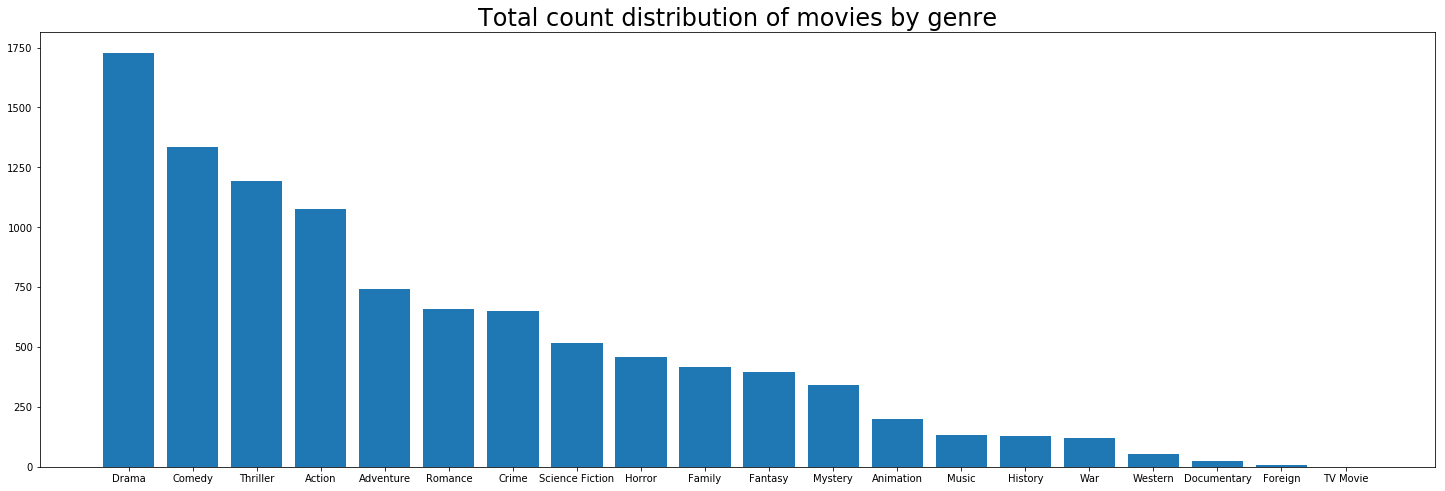

In [44]:
pot_count_genres_hist(count_genres(df_yh),"Total count distribution of movies by genre")

Drama, Comedy, Thriller, Action and Adventure

<a id='rq3'></a>
### 3.3 Research Question 3
#### How was the distribution of genres in the most recent year? How was in the latest year?

In [45]:
df_firstyear = df_yh[df_yh.index == df_yh.index[0]].T
df_firstyear.sort_values(by=[df_yh.index[0]], ascending = False, inplace = True)
df_firstyear.T

,Drama,Action,Comedy,Romance,Adventure,Thriller,Horror,History,Western,Fantasy,Foreign,Family,Documentary,Music,Mystery,Crime,Science Fiction,TV Movie,Animation,War
release_year,,,,,,,,,,,,,,,,,,,,
1960,3,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


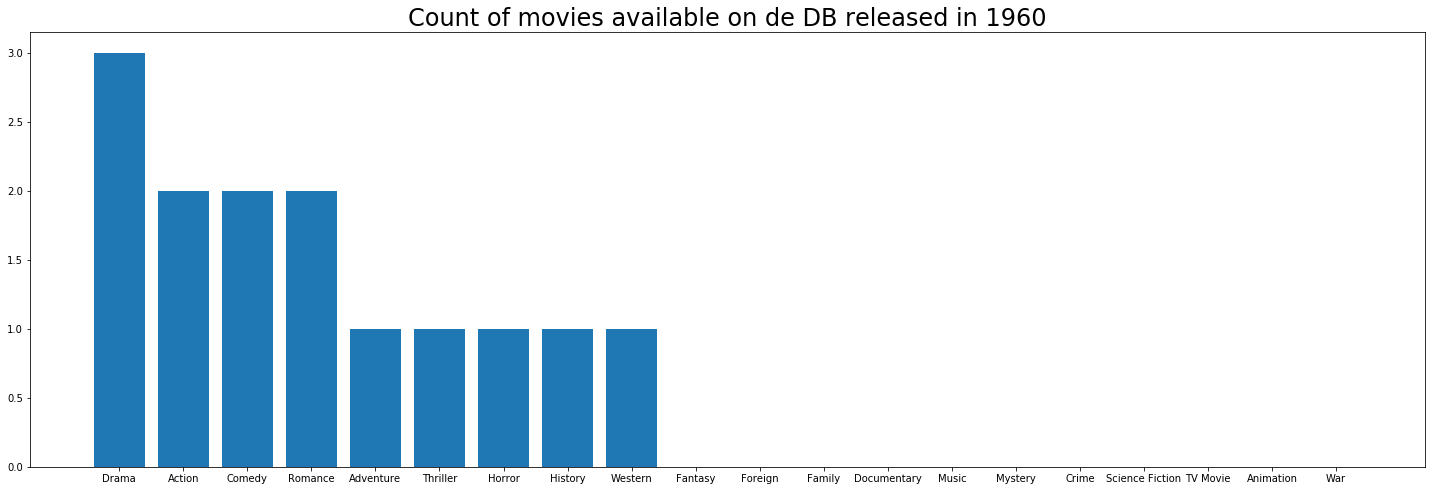

In [46]:
pot_count_genres_hist(df_firstyear,"Count of movies available on de DB released in " + str(df_yh.index[0]) )

In [47]:
df_firstyear = df_yh[df_yh.index == df_yh.index[-1]].T
df_firstyear.sort_values(by=[df_yh.index[-1]], ascending = False, inplace = True)
df_firstyear.T

,Drama,Comedy,Thriller,Action,Adventure,Crime,Science Fiction,Romance,Horror,Family,Fantasy,Mystery,Animation,Music,War,History,Western,TV Movie,Foreign,Documentary
release_year,,,,,,,,,,,,,,,,,,,,
2015,81,52,47,37,34,24,22,18,17,13,13,13,9,9,5,5,2,0,0,0


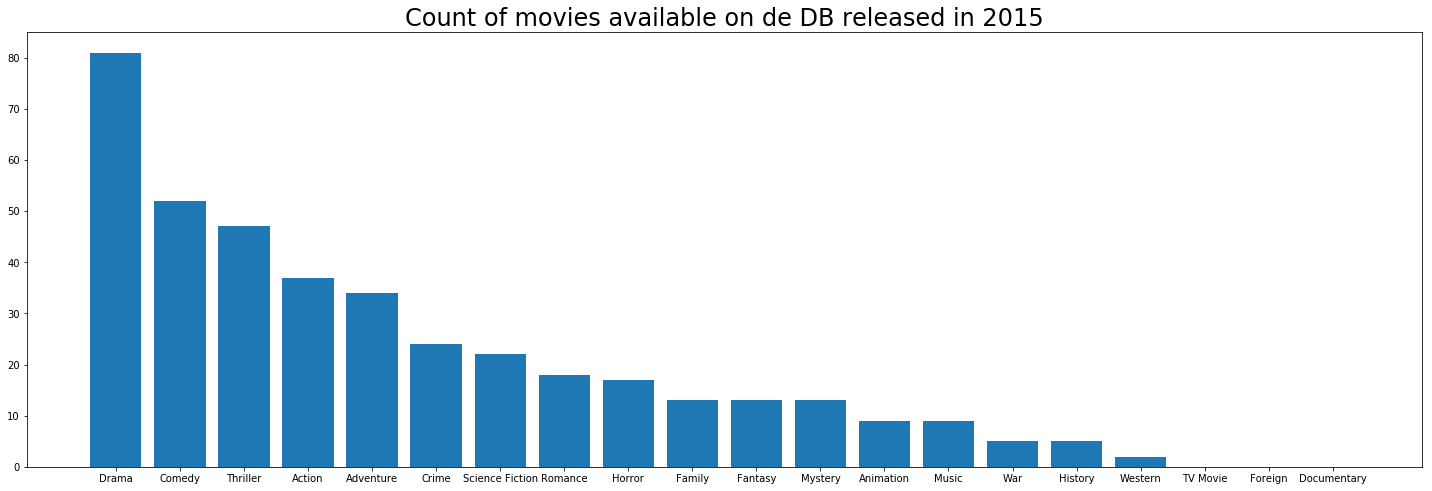

In [48]:
pot_count_genres_hist(df_firstyear,"Count of movies available on de DB released in " + str(df_yh.index[-1]) )

In the first year of release (1960) there are not a lot of movies, only 14, and its distribution is not really meaningful because there is not a significant number of samples. 

On the other hand on the last year of release (2015) the number of movies is significant and their distribution could be argued to be a gaussian centered on drama, comedy, thriller action and adventure.

<a id='rq4'></a>
### 3.4 Research Question 4
#### How has the distribution evolved during the years? did all genres grow in the same rate?

In [49]:
df_yh.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


In [50]:
source = pd.DataFrame(df_yh.T.stack()).reset_index()
source.columns = ["genre", "year", "num_films"]
source.columns = ["category", "x", "y"]

source.head(5)

,category,x,y
0,Action,1960,2
1,Action,1961,2
2,Action,1962,2
3,Action,1963,2
4,Action,1964,1


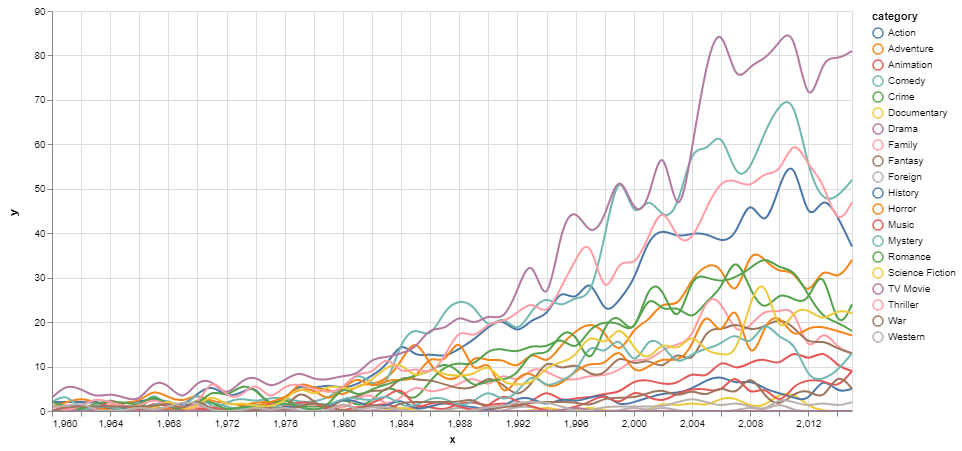

In [51]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=0.5, dy=-0.5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=400
)

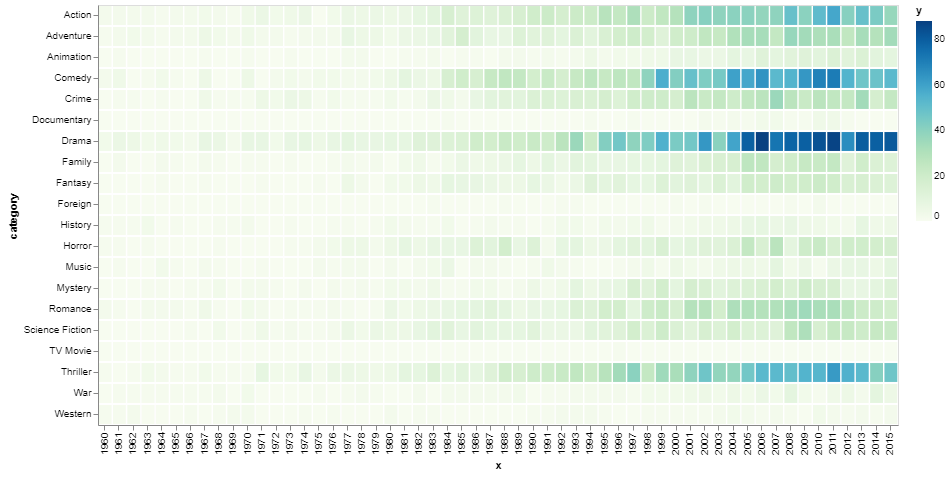

In [52]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
#source = data.seattle_temps.url

    
alt.Chart(source).mark_rect().encode(
    alt.X('x:N'),
    alt.Y('category:N'),
    alt.Color('y:Q',
              scale=alt.Scale(scheme='greenblue')),  
    tooltip = [ alt.Tooltip('category:N', title='Genre'),
                alt.Tooltip('x:N', title='Year'),
                alt.Tooltip('y:Q', title='Films')]).properties(width=800)

Comedy, Drama, Thriller and Action have had the greatest grow in the last years compared to the other movies that grow in a slower rate.

<a id='rq5'></a>
### 3.5 Research Question 5
#### For the most popular genre, report the name of the 20 cast members that appear in more movies of the given genre, and the number of movies in which they appear.

In [53]:
df_cast_anim = pd.DataFrame(df[df.index.isin(df_genres[df_genres["Drama"]==1].index)]["cast"])
df_cast_anim.head(5)

,cast
imdb_id,
tt1663202,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
tt3659388,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...
tt0470752,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...
tt3460252,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...
tt1661199,Lily James|Cate Blanchett|Richard Madden|Helen...


In [54]:
df_cast_anim = df_cast_anim.cast.str.get_dummies("|")
df_cast_anim.head(5)

,50 Cent,A Martinez,A.J. Cook,Aaliyah,Aamir Khan,Aaran Thomas,Aaron Abrams,Aaron Burns,Aaron Eckhart,Aaron Jeffery,...,Zhang Ziyi,Zie Souwand,Zineb Oukach,Zoe Kazan,Zoe Saldana,Zoie Palmer,Zooey Deschanel,ZoÃ« Kravitz,Ãngela Molina,Äá»— Thá»‹ Háº£i Yáº¿n
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt1663202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt3659388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0470752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt3460252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt1661199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_cast_anim_sum = pd.DataFrame(df_cast_anim.sum())
df_cast_anim_sum.rename(columns={ df_cast_anim_sum.columns[0]: "count" }, inplace = True)
df_cast_anim_sum.sort_values(by=['count'], ascending = False, inplace = True)
df_cast_anim_sum.head(20)

,count
Matt Damon,27
Robert De Niro,26
Denzel Washington,24
Meryl Streep,23
Robert Duvall,21
Brad Pitt,21
Tom Hanks,21
Morgan Freeman,20
Sean Penn,20
Julianne Moore,20


The list is reported above, Matt Damon is the lead cast member on Drama films, followed by Robert De Niro and Denzel Washington.

<a id='rq6'></a>
### 3.6 Research Question 6
#### Considering *profit = revenue - budget*, which genre has the greatest average profit?

In [56]:
df["profit"] = df["revenue"] - df["budget"]

C:\Users\xavie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_p = pd.DataFrame(df.profit)
df_p.head(5)

,profit
imdb_id,
tt0369610,1363528810
tt1392190,228436354
tt2908446,185238201
tt2488496,1868178225
tt2820852,1316249360


In [58]:
#reverse one-hot encoding with "melt"
df_mel = pd.melt(df_genres.reset_index(), id_vars = 'imdb_id',value_name='value')
df_mel = df_mel[df_mel.value == 1].reset_index(drop=True) # drop zeros
df_mel.drop(["value"], axis = 1, inplace = True)
df_mel.set_index('imdb_id',inplace= True)
df_mel.rename(columns={"variable":"genre"},inplace = True)
df_mel.head(5)

,genre
imdb_id,
tt0369610,Action
tt1392190,Action
tt2488496,Action
tt2820852,Action
tt1340138,Action


In [59]:
df_p.reset_index(inplace = True)
df_mel.reset_index(inplace = True)

In [60]:
df_gp = df_mel.merge(df_p, on = "imdb_id", how = "left").set_index("imdb_id")
df_gp.head(5)

,genre,profit
imdb_id,,
tt0369610,Action,1363528810
tt1392190,Action,228436354
tt2488496,Action,1868178225
tt2820852,Action,1316249360
tt1340138,Action,285603537


In [61]:
df_gpt = df_gp.groupby("genre").mean().sort_values(by=["profit"], ascending = False)
df_gpt

,profit
genre,
Animation,1.819434e+08
Adventure,1.495625e+08
Fantasy,1.479114e+08
Family,1.433311e+08
Science Fiction,1.083639e+08
Action,1.009221e+08
Comedy,6.531357e+07
War,6.377623e+07
Thriller,6.091785e+07


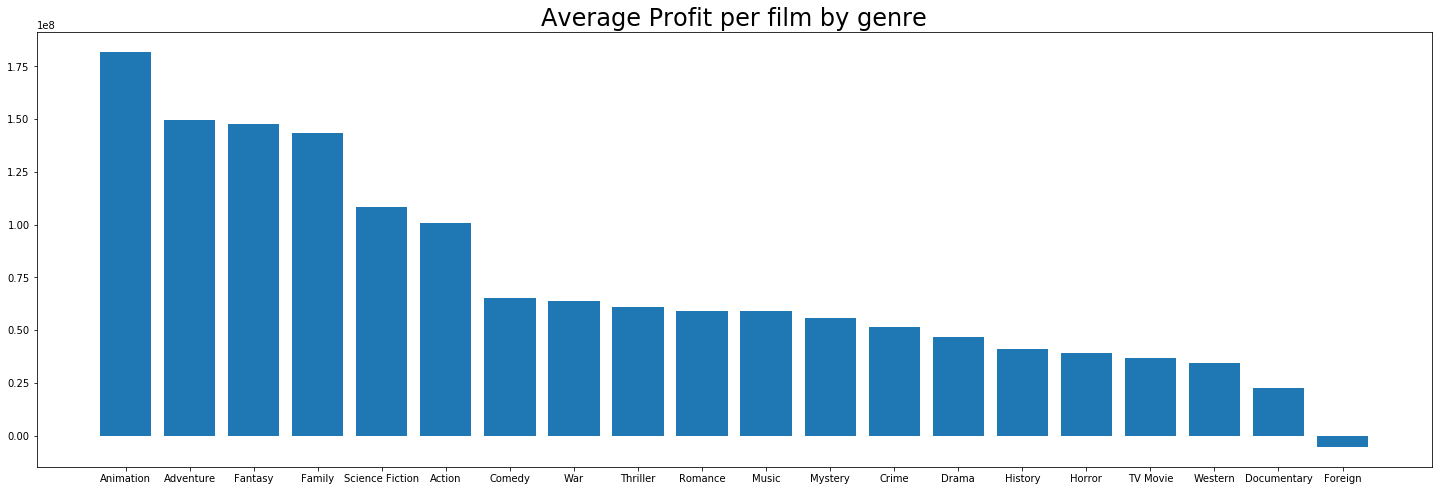

In [62]:
fig = plt.figure(figsize=(25,8))
plt.bar(df_gpt.index,df_gpt.profit)
plt.title("Average Profit per film by genre", fontsize = 24)
plt.show()

The most profitable genre is Animation, which makes a lot of sense.

**Fun**(data)**fact**: Foreign films are the only genre in which the average movie has a negative profit.

<a id='rq7'></a>
### 3.7 Research Question 7 
#### From the most profitable genre, which producer has the most profitable average film production?

In [63]:
#Filter animation movies from df
df_anim = df[df.index.isin(df_mel[df_mel["genre"] == "Animation"].imdb_id)]
df_anim["production_companies"].head(5)

imdb_id
tt2293640        Universal Pictures|Illumination Entertainment
tt2096673    Walt Disney Pictures|Pixar Animation Studios|W...
tt1979388    Walt Disney Pictures|Pixar Animation Studios|B...
tt2224026    Twentieth Century Fox Film Corporation|DreamWo...
tt2452042    Blue Sky Studios|Twentieth Century Fox Animati...
Name: production_companies, dtype: object

In [64]:
df_ap = df_anim.production_companies.str.get_dummies("|")
df_ap.head(5)

,1492 Pictures,20th Century Fox,Aardman Animations,Allied Filmmakers,Amblin Entertainment,American Empirical Pictures,Animal Logic,Appleseed Film Partners,Arc Productions,Bagdasarian Productions,...,Warner Bros. Animation,Warner Bros. Entertainment,Warner Bros. Family Entertainment,Warner Bros. Pictures,Warner Independent Pictures (WIP),Watership Productions,"Weinstein Company, The",Will Vinton Studios,WingNut Films,Zippcast Films
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt2293640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt2096673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt1979388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt2224026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt2452042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_ap_sum = pd.DataFrame(df_ap.sum())
df_ap_sum.rename(columns={ df_ap_sum.columns[0]: "n_movies" }, inplace = True)
df_ap_sum.sort_values(by=['n_movies'], ascending = False, inplace = True)
df_ap_sum.reset_index(drop=False, inplace = True)
df_ap_sum.head(10)

,index,n_movies
0,Walt Disney Pictures,54
1,DreamWorks Animation,29
2,Pixar Animation Studios,16
3,Walt Disney Feature Animation,14
4,Twentieth Century Fox Animation,12
5,Walt Disney Animation Studios,11
6,Columbia Pictures,11
7,Warner Bros. Animation,10
8,Blue Sky Studios,10
9,Sony Pictures Animation,9


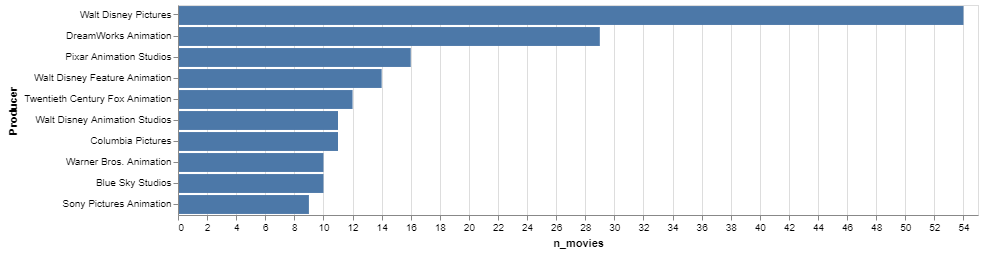

In [66]:
import altair as alt
from vega_datasets import data

source = df_ap_sum.head(10)

alt.Chart(source).mark_bar().encode(
    alt.X('n_movies:Q'),
    alt.Y("index:O",sort = None,title='Producer'),
    tooltip=['n_movies']
    ).properties(width=800)

Walt Disney is a clear winner, note that it appears in more than one category (1st place, 4th place, 6th place ...) some text groupping should be done in a further analysis.

<a id='conc'></a>
## Conclusions



Note that this analysis has severe limitations considering that missing values have been dropped, the analysis contains an ablation study arguing that the distribution of missing values is not different from the data overeall).
Also duplicated movies have been removed.

This dropping of data must be taken into consideration in future analysis for this dataset.

>The research questions I have been interested on answering can be classified in two categories:
- **Genre/Cast based**:
>><a href="#rq1">**RQ1**:</a> **Which genres appear more times in the dataset form year to year?**
>>
>> Top winners genres are *Adenture, Comedy, Drama, Action* and *Thriller*, those are the genres that have been leads on number of movies in our database in at least one year of release date.
>>
>><a href="#rq2">**RQ2**:</a> **What are the total top 5 more frequent genres on the dataset?**
>>
>>Drama, Comedy, Thriller, Action and Adventure
>>
>><a href="#rq3">**RQ3**:</a> **How was the distribution of genres in the most recent year? How was in the latest year?**
>>
>>
>>During the first year of release (1960) there are not a lot of movies, only 14, and its distribution is not really meaningful because there is not a significant number of samples. 
>>
>>On the other hand on the last year of release (2015) the number of movies is significant and their distribution could be argued to be a gaussian centered on drama, comedy, thriller action and adventure.
>>
>><a href="#rq4">**RQ4**:</a>  **How has the distribution evolved during the years? did all genres grow in the same rate?** 
>>
>>*Comedy, Drama, Thriller* and *Action* have had the greatest grow in the last years compared to the other movies that grow in a slower rate.
>>
>><a href="#rq5">**RQ5**:</a> **For the most popular genre, report the name of the 20 cast members that appear in more movies of the given genre, and the number of movies in which they appear.**
>>
>>The list is reported above, *Matt Damon* is the lead cast member on Drama films, followed by *Robert De Niro* and *Denzel Washington*.
>
>- **Revenue based**:
>><a href="#rq6">**RQ6**:</a> **Considering *profit = revenue - budget*, which genre has the greatest average profit?**
>>
>>The most profitable genre is *Animation*, which makes a lot of sense.
>>
>><a href="#rq7">**RQ7**:</a> **From the most profitable *genre*, which *producer* has the most profitable average film production?**
>>
>> Walt Disney is a clear winner, note that it appears in more than one category (1st place, 4th place, 6th place ...) some text groupping should be done in a further analysis.